In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [43]:
iris_df=pd.read_excel("Iris data.xls")
iris_df.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
iris_df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
iris            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [46]:
iris_df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
iris            0
dtype: int64

In [47]:
iris_df.shape

(150, 5)

In [48]:
le=preprocessing.LabelEncoder()

In [49]:
iris_df["iris"]=le.fit_transform(iris_df["iris"])
iris_df["iris"].value_counts()

2    50
1    50
0    50
Name: iris, dtype: int64

In [50]:
iris=iris_df["iris"]
iris.head()

0    0
1    0
2    0
3    0
4    0
Name: iris, dtype: int64

In [51]:
iris_df.drop(["iris"],axis=1,inplace=True)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
scaler = MinMaxScaler()

norm_iris= pd.DataFrame(scaler.fit_transform(iris_df))
norm_iris.head(3)

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


In [53]:
norm_iris["iris"]=iris
norm_iris.head()

,0,1,2,3,iris
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [54]:
norm_iris.columns=["sepal length","sepal width","petal length","petal width","iris"]
norm_iris.head()

,sepal length,sepal width,petal length,petal width,iris
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [55]:
feature=norm_iris.loc[:,["sepal length","sepal width","petal length","petal width"]]
dependent=norm_iris.loc[:,"iris"]
iris_train,iris_test,label_train,label_test=train_test_split(feature,dependent,test_size=0.40,random_state=0)
display(iris_train.shape)
display(iris_test.shape)

(90, 4)

(60, 4)

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [57]:
lda=LDA(n_components=2)
iris_train=lda.fit_transform(iris_train,label_train)
iris_test=lda.transform(iris_test)

In [58]:
explained_variance=lda.explained_variance_ratio_
explained_variance

array([0.99089217, 0.00910783])

In [59]:
mod=LogisticRegression()
mod.fit(iris_train,label_train)


# predicting the test set results

y_pred=mod.predict(iris_test)

In [60]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
cm=confusion_matrix(label_test,y_pred)
display(cm)

array([[16,  0,  0],
       [ 0, 16,  7],
       [ 0,  5, 16]], dtype=int64)

In [63]:
accuracy_score(label_test,y_pred)

0.8

In [64]:
print("train accuracy")
display(mod.score(iris_train,label_train))


print("test accuracy")
display(mod.score(iris_test,label_test))

train accuracy


0.9444444444444444

test accuracy


0.8

In [65]:
train_prediction=mod.predict(iris_train)
test_prediction=mod.predict(iris_test)
train_conf_matrix=confusion_matrix(label_train,train_prediction)
test_conf_matrix=confusion_matrix(label_test,test_prediction)

In [66]:
pd.DataFrame(train_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0,1,2
0,34,0,0
1,0,23,4
2,0,1,28


In [67]:
pd.DataFrame(test_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0,1,2
0,16,0,0
1,0,16,7
2,0,5,16


In [68]:
print(classification_report(label_train,train_prediction))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.96      0.85      0.90        27
          2       0.88      0.97      0.92        29

avg / total       0.95      0.94      0.94        90



In [69]:
print(classification_report(label_test,test_prediction))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.76      0.70      0.73        23
          2       0.70      0.76      0.73        21

avg / total       0.80      0.80      0.80        60



In [70]:
# decision tree algorithm 

model=DecisionTreeClassifier()

model.fit(iris_train,label_train)
print("train accuracy")
display(model.score(iris_train,label_train))

print("test accuracy")
display(model.score(iris_test,label_test))


train accuracy


1.0

test accuracy


0.95

In [71]:
y_pred=model.predict(iris_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2], dtype=int64)

In [72]:
cm=confusion_matrix(label_test,y_pred)
display(cm)

array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  2, 19]], dtype=int64)

In [73]:
# k nearest algorithm    


kmodel=KNeighborsClassifier(n_neighbors=3,metric="euclidean")


kmodel.fit(iris_train,label_train)
print("train accuracy")
display(kmodel.score(iris_train,label_train))

print("test accuracy")
display(kmodel.score(iris_test,label_test))


train accuracy


0.9777777777777777

test accuracy


0.9333333333333333

In [74]:
y_pred=kmodel.predict(iris_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2], dtype=int64)

In [75]:
cm=confusion_matrix(label_test,y_pred)
display(cm)

array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  3, 18]], dtype=int64)

In [76]:
smodel=SVC(kernel="rbf")
smodel.fit(iris_train,label_train)
print("train accuracy")
display(smodel.score(iris_train,label_train))

print("test accuracy")
display(smodel.score(iris_test,label_test))


train accuracy


0.9888888888888889

test accuracy


0.95

In [77]:
y_pred=kmodel.predict(iris_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2], dtype=int64)

In [78]:
cm=confusion_matrix(label_test,y_pred)
display(cm)

array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  3, 18]], dtype=int64)

In [79]:
## RandomForestClassifier ensemble technique

from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier(n_estimators=10,min_samples_split=20,min_impurity_decrease=0.1)
rmodel.fit(iris_train,label_train)
print("train accuracy")
display(rmodel.score(iris_train,label_train))

print("test accuracy")
display(rmodel.score(iris_test,label_test))

train accuracy


0.9888888888888889

test accuracy


0.8666666666666667

In [80]:
from sklearn.ensemble import AdaBoostClassifier
amodel=AdaBoostClassifier(n_estimators=10)
amodel.fit(iris_train,label_train)
print("train accuracy")
display(amodel.score(iris_train,label_train))

print("test accuracy")
display(amodel.score(iris_test,label_test))

train accuracy


1.0

test accuracy


0.95

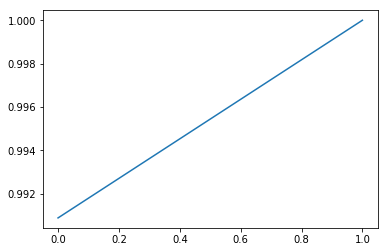

In [81]:
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.show()